## Filter Methods: Statistical & Ranking Methods

**Statistical Ranking Methods:**

1. **Information Gain - Mutual Information**

    Mutual Information measures how much information the presence/absence of a feature contributes to making the correct prediction on target Y. It measures how much knowing about one variable reduces the uncertainity about the other.

2. **Fisher Score**
3. **Univariate Tests**
4. **Univariate ROC/AUC/RMSE**

**Two Steps:**

1. Rank features based on certain criteria/metric.
2. Select features with highest ranking.

In [15]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [16]:
# Load Dataset
df = pd.read_csv('~/Documents/Feature-Selection-for-Machine-Learning-master/Datasets/santander-customer-satisfaction.csv', nrows=76020)
df.shape

(76020, 371)

In [17]:
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [18]:
# Get Numerical features from dataset# Get N 
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [19]:
data = df[numerical_features]

In [6]:
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [20]:
X = data.drop(['TARGET','ID'], axis=1)
X.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [21]:
y = data['TARGET']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [22]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((53214, 369), (53214,), (22806, 369), (22806,))

### Mutual Information using Classification

In [10]:
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info

array([3.92694389e-04, 1.26276507e-02, 0.00000000e+00, 0.00000000e+00,
       7.59641637e-04, 0.00000000e+00, 2.01377034e-04, 1.77408981e-04,
       7.07475846e-04, 1.39270323e-03, 0.00000000e+00, 5.42515915e-04,
       0.00000000e+00, 2.29717822e-03, 0.00000000e+00, 2.01664506e-03,
       0.00000000e+00, 2.56632895e-04, 1.41275058e-03, 4.17533788e-04,
       1.79132002e-04, 4.78213452e-04, 1.51529956e-04, 1.07129712e-02,
       1.43892578e-02, 4.01539742e-04, 0.00000000e+00, 1.10247672e-03,
       4.53780492e-04, 2.41005599e-03, 0.00000000e+00, 1.11389471e-03,
       5.05379971e-04, 0.00000000e+00, 0.00000000e+00, 3.67185818e-04,
       0.00000000e+00, 0.00000000e+00, 2.85848863e-04, 1.34623323e-04,
       0.00000000e+00, 0.00000000e+00, 4.11072223e-04, 0.00000000e+00,
       6.06149693e-04, 0.00000000e+00, 3.75153152e-04, 9.39447658e-04,
       4.03447919e-04, 0.00000000e+00, 1.00980282e-03, 1.03954490e-04,
       6.03977502e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [11]:
# Create Feature Target Mutual Information Series
print("Feature Ranking:")
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)


Feature Ranking:


num_var30              0.016906
ind_var30              0.015697
num_meses_var5_ult3    0.015410
num_var42              0.014912
num_var5               0.014695
                         ...   
ind_var10cte_ult1      0.000000
num_op_var39_hace3     0.000000
ind_var9_cte_ult1      0.000000
ind_var9_ult1          0.000000
saldo_var32            0.000000
Length: 369, dtype: float64

Feature ranking:
1. feature 368 (0.371890)
2. feature 1 (0.182174)
3. feature 331 (0.030135)
4. feature 329 (0.028576)
5. feature 326 (0.020854)
6. feature 324 (0.017467)
7. feature 328 (0.016598)
8. feature 182 (0.016253)
9. feature 277 (0.015378)
10. feature 323 (0.015194)
11. feature 190 (0.014129)
12. feature 330 (0.013004)
13. feature 164 (0.011254)
14. feature 325 (0.010962)
15. feature 275 (0.010756)
16. feature 274 (0.010602)
17. feature 279 (0.010529)
18. feature 193 (0.008156)
19. feature 276 (0.007233)
20. feature 289 (0.007085)
21. feature 278 (0.005605)
22. feature 280 (0.005056)
23. feature 147 (0.004406)
24. feature 17 (0.004185)
25. feature 14 (0.004144)
26. feature 11 (0.003936)
27. feature 13 (0.003898)
28. feature 4 (0.003884)
29. feature 16 (0.003851)
30. feature 10 (0.003812)
31. feature 241 (0.003790)
32. feature 3 (0.003583)
33. feature 126 (0.003468)
34. feature 0 (0.003385)
35. feature 63 (0.003319)
36. feature 88 (0.003230)
37. feature 187 (0.003200)
38. featu

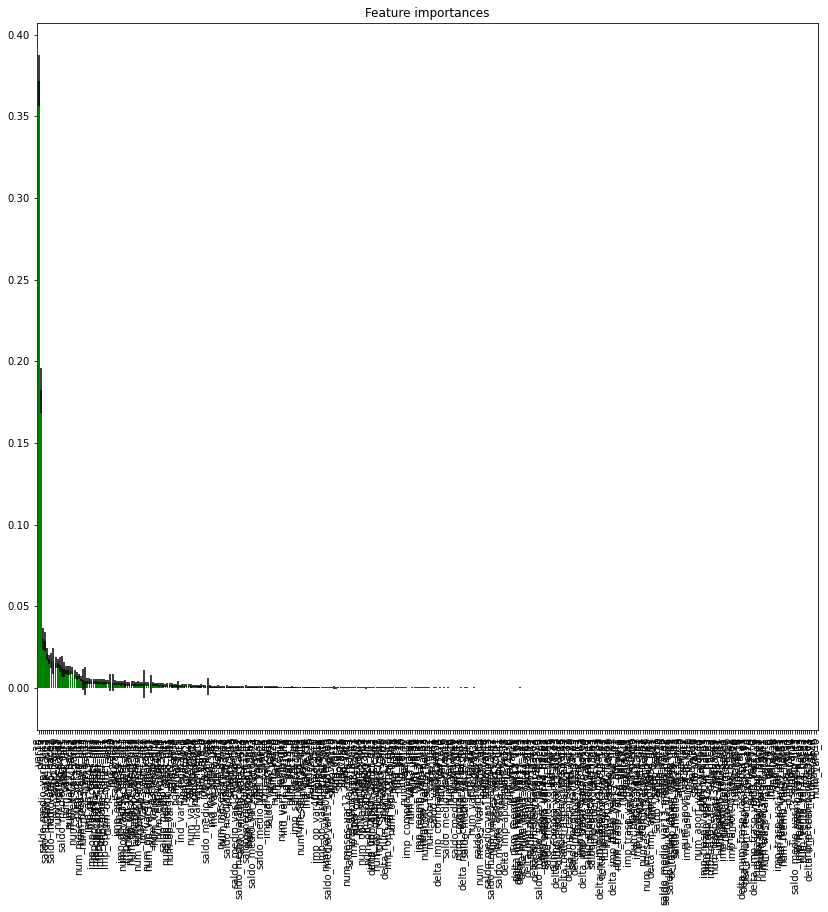

In [23]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(X_train,y_train)

clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(X_train,y_train)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

Text(0.5, 0, 'Features')

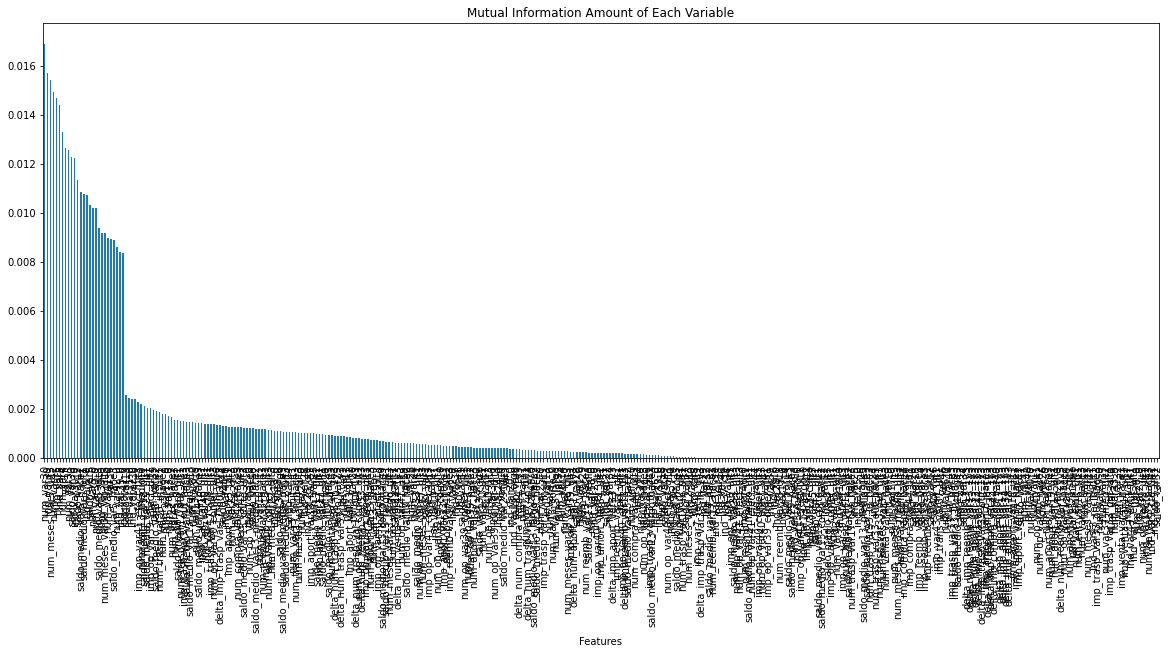

In [13]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.title("Mutual Information Amount of Each Variable")
plt.xlabel("Features")


In [14]:
k_percentile_features = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train.fillna(0), y_train)
k_percentile_features.to_csv('Selectedfeature_customer-satisfaction.csv', index=False)

AttributeError: 'SelectPercentile' object has no attribute 'to_csv'

As we can see in the plot above from left to right, the features which have the most amount of mutual information is on the left and the features with the least amount of mutual information are on the right. Some of the features contribute a lot to the mutual information whereas some of them do not contribute anything. So, to select the important features from this list, we can set a threshold like maybe select the first 10 percentile of features or first 20 features etc.

To do this we can use a combination of "SelectKbest" or "SelectPercentile".

In [ ]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 features: {}'.format(X_train.columns[k_best_features.get_support()]))

var15 is the age of the customer. 

In [ ]:
#k_best_features.sort_values(ascending=False)
k_best_features.index = X_train.columns
k_best_features.index.sort_values(ascending=False)


In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

In [25]:
import time

In [1]:
k_best_features = SelectKBest(mutual_info_classif, k=160).fit(X_train.fillna(0), y_train)
x_train_2 = k_best_features.transform(X_train)
x_test_2 = k_best_features.transform(X_test)
#random forest classifier with n_estimators=10 (default)
start_time = time.time()

clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(X_train,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(X_test))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(X_test))
sns.heatmap(cm_2,annot=True,fmt="d")
print("--- %s seconds ---" % (time.time() - start_time))

NameError: name 'SelectKBest' is not defined

In [ ]:
scores = -np.log10(k_best_features.pvalues_)
scores /= scores.max()
plt.bar(X_indices - .45, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)')
# Compare to the weights of an SVM
clf = make_pipeline(MinMaxScaler(), LinearSVC())
clf.fit(X_train, y_train)
print('Classification accuracy without selecting features: {:.3f}'
      .format(clf.score(X_test, y_test)))

svm_weights = np.abs(clf[-1].coef_).sum(axis=0)
svm_weights /= svm_weights.sum()

plt.bar(X_indices - .25, svm_weights, width=.2, label='SVM weight')

clf_selected = make_pipeline(
        SelectKBest(f_classif, k=10), MinMaxScaler(), LinearSVC()
)
clf_selected.fit(X_train, y_train)
print('Classification accuracy after univariate feature selection: {:.3f}'
      .format(clf_selected.score(X_test, y_test)))

svm_weights_selected = np.abs(clf_selected[-1].coef_).sum(axis=0)
svm_weights_selected /= svm_weights_selected.sum()

plt.bar(X_indices[selector.get_support()] - .05, svm_weights_selected,
        width=.2, label='SVM weights after selection')


plt.title("Comparing feature selection")
plt.xlabel('Feature number')
plt.yticks(())
plt.axis('tight')
plt.legend(loc='upper right')
plt.show()

### Mutual Information using Regression

In [ ]:
# Load Dataset
df = pd.read_csv('~/Documents/Feature-Selection-for-Machine-Learning-master/Datasets/house-prices-advanced-regression-techniques/house_price_data.csv')
df.shape

In [ ]:
df.head()

In [ ]:
# Get Numerical features from dataset# Get N 
numerics = ['int16', 'int32','int64', 'float16', 'float32', 'float64']
numerical_features = list(df.select_dtypes(include=numerics).columns)

In [ ]:
data = df[numerical_features]

In [ ]:
data.head()

In [ ]:
X = data.drop(['SalePrice'], axis=1)
X.head()

In [ ]:
y = data['SalePrice']
y.head()

In [ ]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
# Mutual Information Regressor
# Calculate Mutual Information between each feature and the target
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

In [ ]:
# Create Feature Target Mutual Information Series
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

In [ ]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [ ]:
# Select K best features
k_percentile_features = SelectPercentile(mutual_info_classif, percentile=10).fit(X_train.fillna(0), y_train)
print('Selected top 10 percentile features: {}'.format(X_train.columns[k_percentile_features.get_support()]))